# Bike Sharing Assignment 

### Problem Statement: 
A bike-sharing system is a service in which bikes are made available for shared use to
individuals on a short-term basis for a price or free. Many bike share systems allow people to
borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the
payment information, and the system unlocks it. This bike can then be returned to another
dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their
revenues due to the ongoing Corona pandemic. The company is finding it very difficult to
sustain in the current market scenario. So, it has decided to come up with a mindful business
plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end,
and the economy restores to a healthy state.

### Goals:

Develop a model to find the variable which are significant the demand for shared bikes with the available independent variables.

It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset and understanding the data

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Check for Null values

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no Null values

## Data Cleaning

In [7]:
# dropping unneccessary columns.
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [8]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace = True)

In [9]:
# checking head of dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# dropping duplicates

df.drop_duplicates(inplace = True)
df.shape

(730, 12)

As the number of rows is same after dropping duplicate, hence there was no duplicates.

#### Handling Outliers

In [11]:
# Columns in Dataset

df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
# number of unique values in each columns

df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

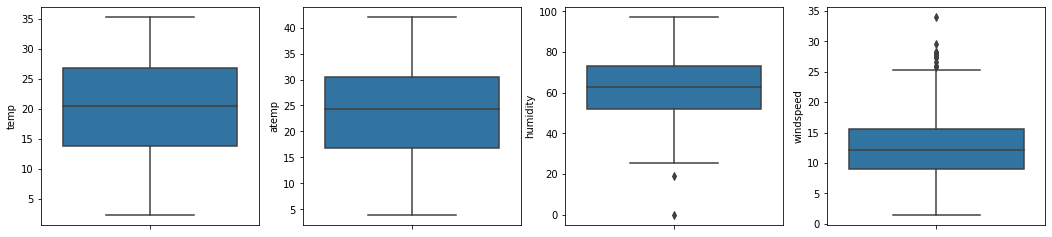

In [13]:
# box-plot for indentifying outliers

cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y = col, data = df)
    i+=1

From above plots, we can see we don't have outliers in our dataset.

In [14]:
# value count of season column 

df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
#value count of weathersit column 

df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
#converting season, weathersit, month, weekday to categorical types

df.season.replace({1:"Winter",2:"Summer", 3:"Autumn", 4:"Rainy"}, inplace = True)

df.weathersit.replace({1:"Good",2:"Moderate", 3:"Bad", 4:"Severe"}, inplace = True)

df.month.replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
                       7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}, inplace = True)

df.weekday.replace({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}, inplace = True)

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Winter,0,Jan,0,Mon,1,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Winter,0,Jan,0,Tue,1,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Winter,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Winter,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Winter,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory data Analysis

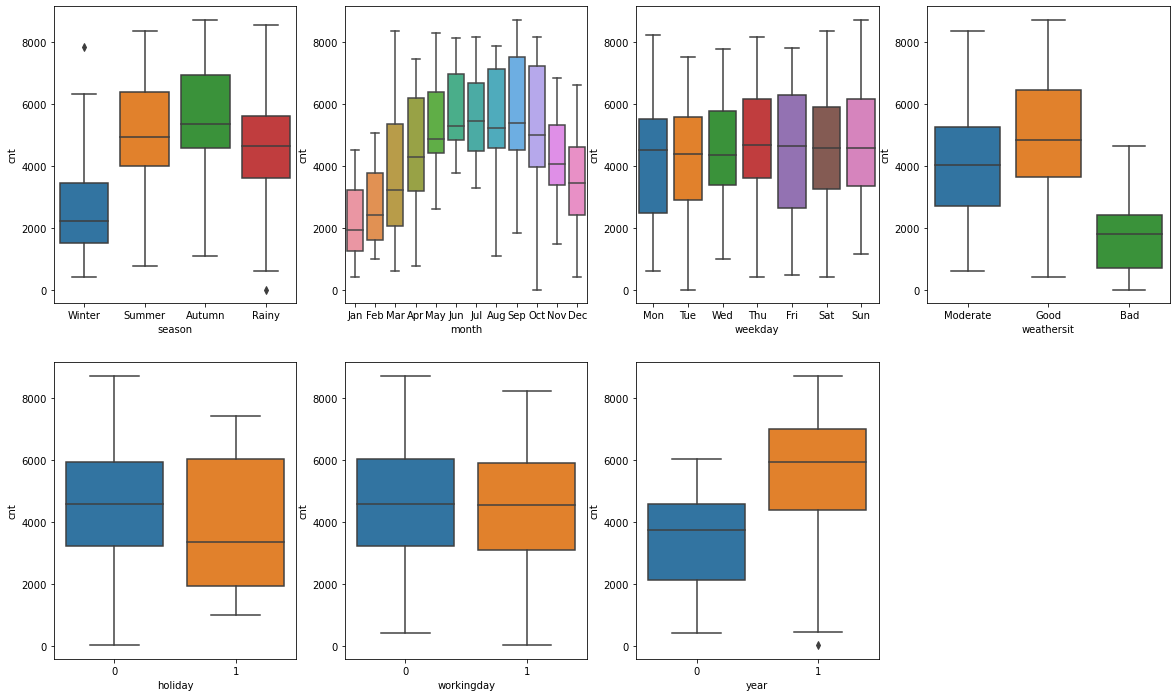

In [17]:
#Visualizing the categorical columns to see how predictor variable stand against the target variable.

plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x = "season", y = 'cnt', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = "month", y = 'cnt', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = "weekday", y = 'cnt', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = "weathersit", y = 'cnt', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = "holiday", y = 'cnt', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = "workingday", y = 'cnt', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = "year", y = 'cnt', data = df)
plt.show()

Insights that can be drawn from above visualiztion:

1. Season 3:Autumn has the highest demand for rental bikes.
2. Demand is continuously growing till june, september has the highest demand. After september, demand is decreasing.
3. Demand in all the weekdays are same.
4. The good weathersit has high demand.
5. Demand decreases during holidays.
6. Demand for next year has grown.

In [18]:
# function to create barplot related to categorical columns

def plot_cat(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column, 'cnt', data = df)
    plt.subplot(1,2,2)
    sns.barplot(column, 'cnt', data = df, hue='year', palette = 'Set1')
    plt.legend(labels = ['2018','2019'])
    plt.show()

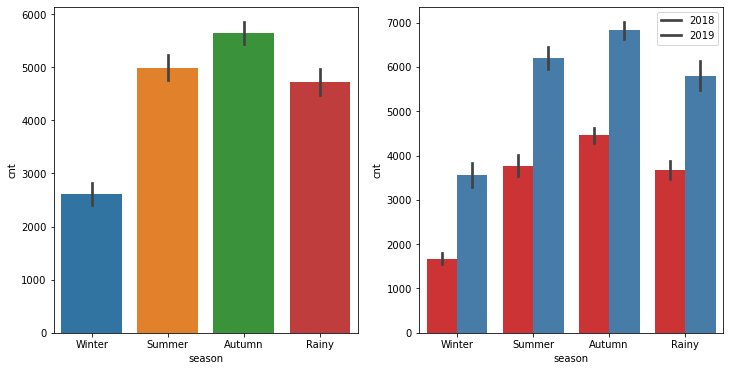

In [19]:
# visualization of season column

plot_cat('season')

Season 3, i.e, Autumn season tends to have more demand for rental bikes. Each season the booking count has increased from 2018 to 2019.

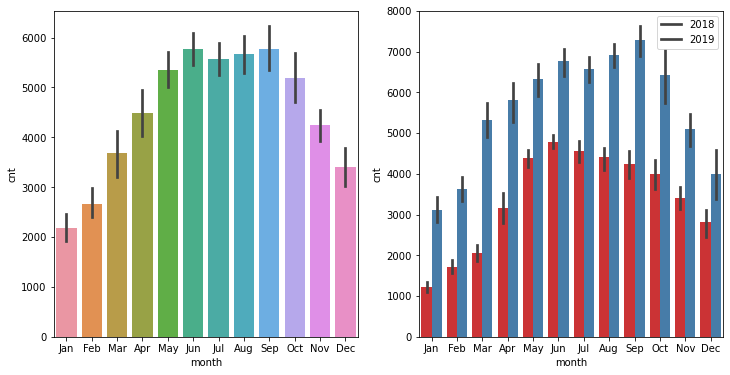

In [20]:
# visualization of month columan

plot_cat('month')

Demand is high during the mid of the year, i.e, in the month of may, june, july, aug, sep. Demand start decreasing as we approach towards the end of the year. Each month demand has been increased from 2018 to 2019.

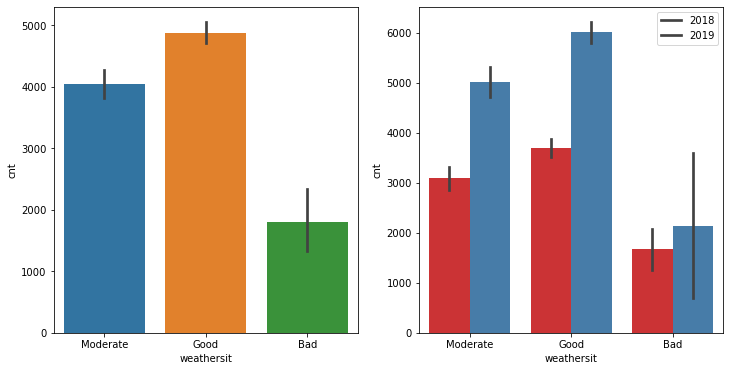

In [21]:
# visualization of weathersit columan

plot_cat('weathersit')

Good weather has high demand which is obvious. Demand for rental bike has increased for each weather situation form 2018 to 2019.

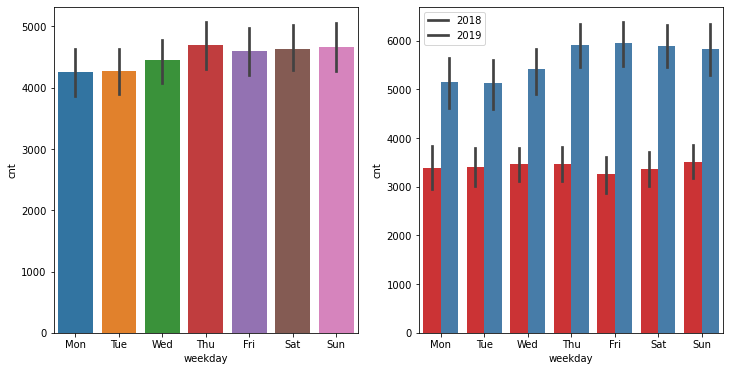

In [22]:
# visualization of weekday columan

plot_cat('weekday')

Demand for rental bike is almost same in each weekday. Although the demand has increased in the year 2019.

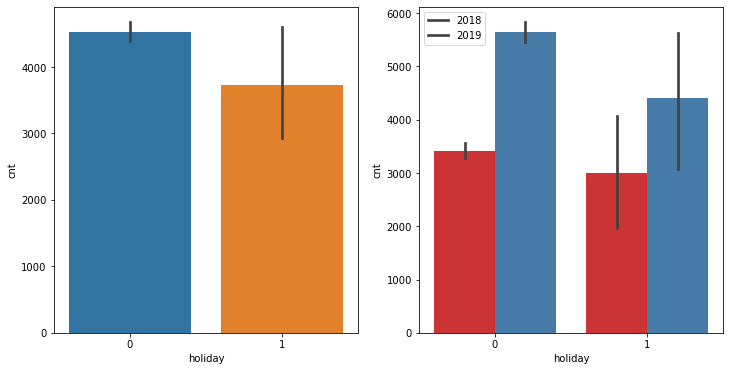

In [23]:
# visualization of holiday columan

plot_cat('holiday')

During holidays, demand is less, which is reasonable.

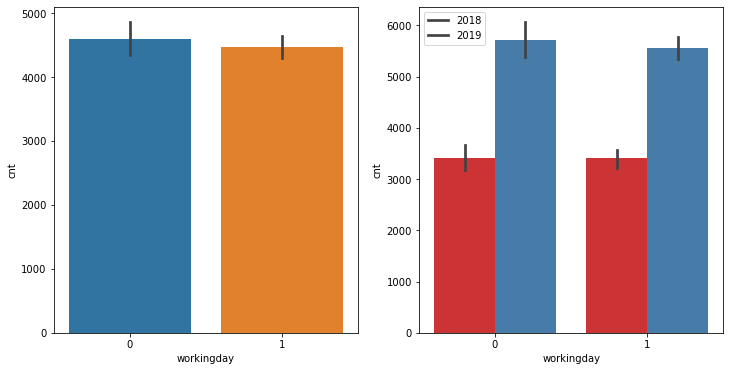

In [24]:
# visualization of workingday columan

plot_cat('workingday')

Demand seems same in working and non-working days. But, the demand has increased from 2018 to 2019.

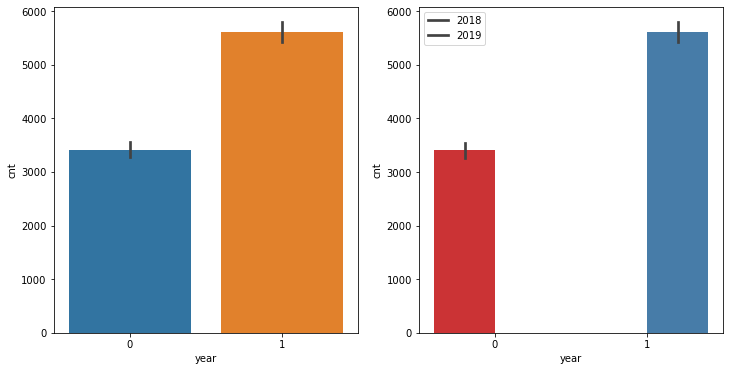

In [25]:
# visualization of year columan

plot_cat('year')

Demand has been increased in the year 2019 from the previous year which is good.

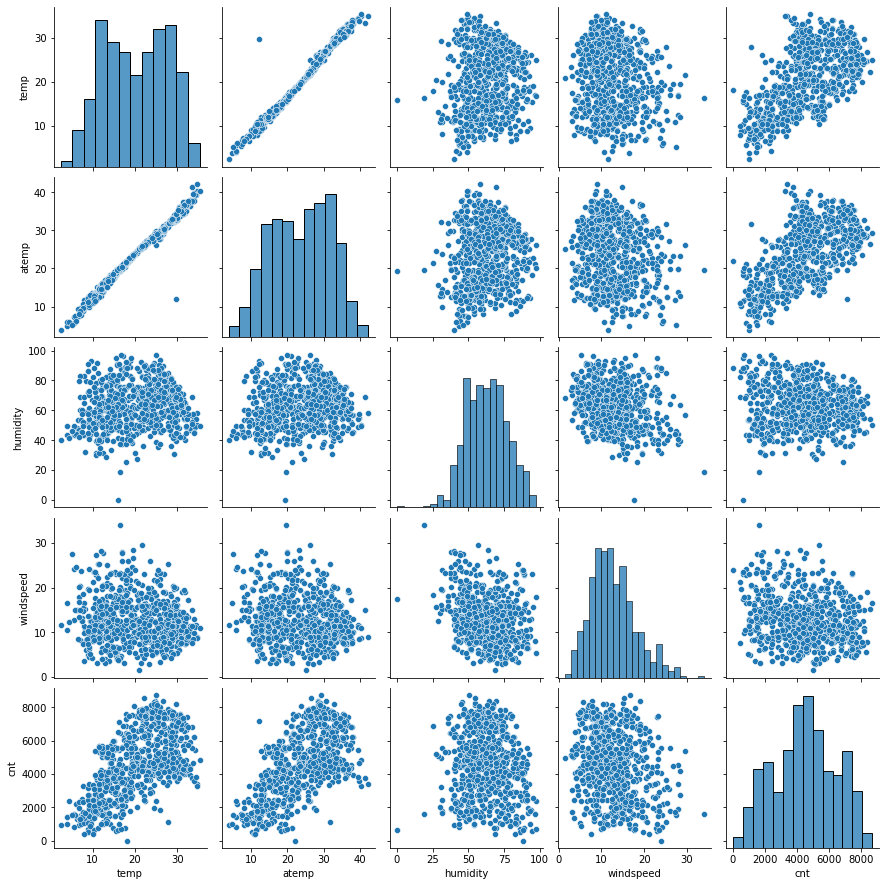

In [26]:
# Visualizing the continuous numerical coulmns using pairplot.

sns.pairplot(data = df, vars =['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

Insights:
1. Looks like temp and atemp has the highest corelation with the target variable.
2. temp and atemp are highly co-related with each other.

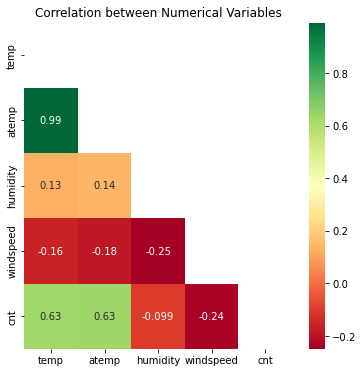

In [27]:
#correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is a liner relationship between temp and atemp. Due to multicolinearity, we cannot use both the parameters int he model. We will decide which one to keep based on VIF and p-value w.r.t other variable.

## Data Preparation

In [28]:
# creating dummy variable for month, weekday, weathersit and season variables.

df = pd.get_dummies(data = df, columns=['season','month','weekday','weathersit'], drop_first = True)
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_Rainy,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
#checking the column info of the new dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_Rainy         730 non-null    uint8  
 9   season_Summer        730 non-null    uint8  
 10  season_Winter        730 non-null    uint8  
 11  month_Aug            730 non-null    uint8  
 12  month_Dec            730 non-null    uint8  
 13  month_Feb            730 non-null    uint8  
 14  month_Jan            730 non-null    uint8  
 15  month_Jul            730 non-null    uin

## Splitting Data into Training and Testing.

In [30]:
y = df.pop('cnt')
x = df

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [32]:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [33]:
#using MixMAxScaler to Rescaling the features

scaler = MinMaxScaler()

In [34]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [35]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Rainy,season_Summer,season_Winter,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Good,weathersit_Moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,1,0,0,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Building Model using RFE and Automated approach

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
#selecting 15 features using automated approach

rfe = RFE(lr, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [38]:
#Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Rainy', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 12),
 ('month_Mar', False, 15),
 ('month_May', False, 9),
 ('month_Nov', True, 1),
 ('month_Oct', False, 13),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

## Manual Approach

In [39]:
#function to build a model using statsmodel api

def model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [40]:
# function to calculate VIFs

def vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [41]:
#Print Columns selected by RFE.

X_train.columns[rfe.support_]

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [42]:
# columns not selected by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_Aug', 'month_Feb', 'month_Jun',
       'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Build Model 

### Model-1

In [43]:
# selecting all the columns selected by RFE for model-1 

cols = ['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'weathersit_Good', 'weathersit_Moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.29e-189
Time:                        19:49:13   Log-Likelihood:                -4120.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 660.8747    

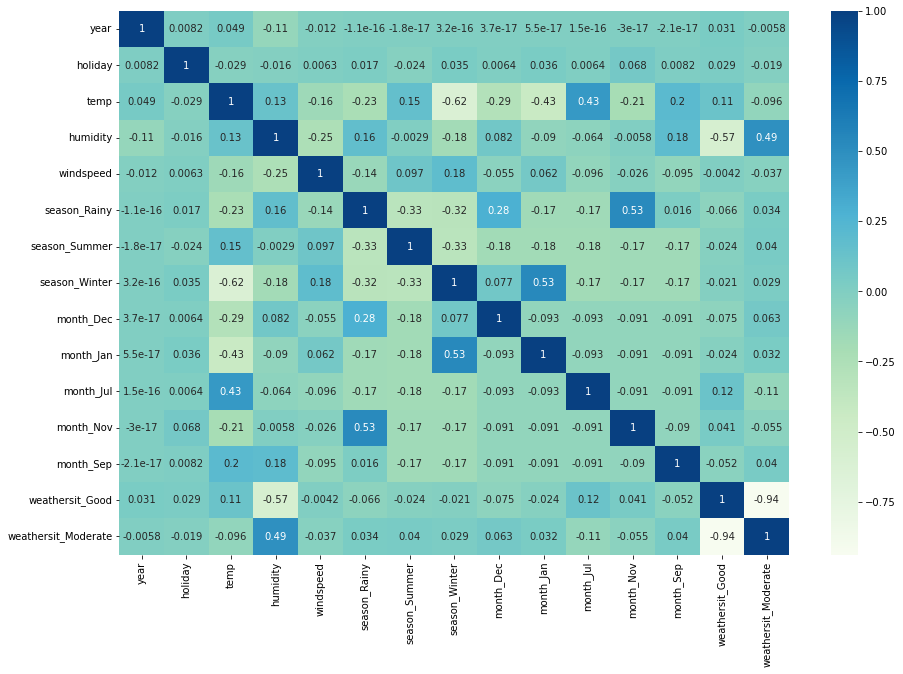

In [44]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'weathersit_Good', 'weathersit_Moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

### Model-2

In [45]:
# Dropping the variable month_Dec as it has negative coefficient and is insignificant as it has high p-value.

cols = ['year', 'holiday', 'temp', 'humidity','windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Jan', 'month_Jul',
       'month_Nov', 'month_Sep', 'weathersit_Good', 'weathersit_Moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.49e-189
Time:                        19:49:13   Log-Likelihood:                -4122.3
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 567.0571    

### Model-3

In [46]:
# Dropping the variable month_Nov as it has negative coefficient and is insignificant as it has high p-value.

cols = ['year', 'holiday', 'temp', 'humidity','windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Jan', 'month_Jul',
        'month_Sep', 'weathersit_Good', 'weathersit_Moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.94e-190
Time:                        19:49:14   Log-Likelihood:                -4123.4
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 514.0103    

### Model-4

In [47]:
# Dropping the variable month_Jan as it has negative coefficient and is insignificant as it has high p-value.

cols = ['year', 'holiday', 'temp', 'humidity','windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Jul',
        'month_Sep', 'weathersit_Good', 'weathersit_Moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.12e-190
Time:                        19:49:14   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 433.2057    

### Model-5

In [48]:
# Dropping the variable humidity as it has high VIF value.

cols = ['year', 'holiday', 'temp', 'windspeed', 'season_Rainy',
       'season_Summer', 'season_Winter', 'month_Jul',
        'month_Sep', 'weathersit_Good', 'weathersit_Moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.09e-187
Time:                        19:49:14   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -726.5023    

### Model-6

In [49]:
# Dropping the variable weathersit_Good as it has high VIF value.

cols = ['year', 'holiday', 'temp', 'windspeed', 'season_Rainy','season_Summer', 
        'season_Winter', 'month_Jul','month_Sep', 'weathersit_Moderate']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          3.50e-163
Time:                        19:49:14   Log-Likelihood:                -4195.9
No. Observations:                 511   AIC:                             8414.
Df Residuals:                     500   BIC:                             8460.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1641.8934    

## Inference

##### Here VIF seems to be almost accepted and p-value for all the features is nearly 0.0 and R-squared and Adj. R-squared is nearly 80%. So, let us consider the above model i.e Model-6 as our final model, as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model. 

In [50]:
#Build a model with all columns to select features automatically
def build_model(X, y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [51]:
# build the final model using sklearn
cols = ['year', 'holiday', 'temp', 'windspeed', 'season_Rainy','season_Summer', 
        'season_Winter', 'month_Jul','month_Sep', 'weathersit_Moderate']

lr = build_model(X_train[cols], y_train)
print(lr.intercept_,lr.coef_)

1641.8933829792054 [ 2082.75668765  -734.49928231  4381.67549147 -1539.44601753
   637.71972462   430.38654829  -517.7839507   -477.3194104
   582.79464275  -585.48041532]


## Model Evaluation

### Residual Analysis

In [52]:
y_train_pred = lr.predict(X_train[cols])

In [53]:
#Ploting histogram of the error terms

def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

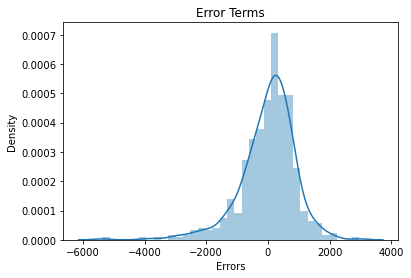

In [54]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

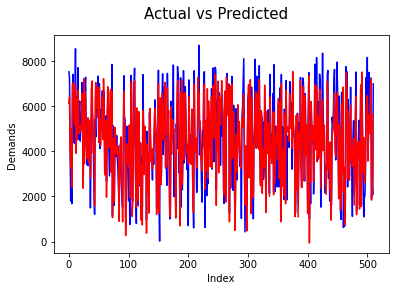

In [55]:
# Actual vs Predicted

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems fine.


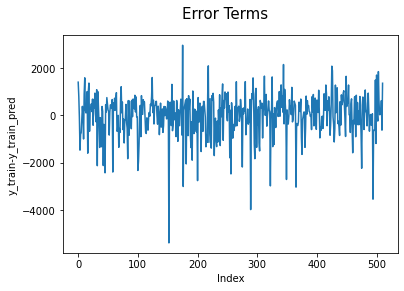

In [56]:
# Error Terms

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [57]:
#R-squared Value
r2_score(y_train,y_train_pred)

0.7916093576382958

 R2 is same as we obtained from our final model.

### Linearity Check

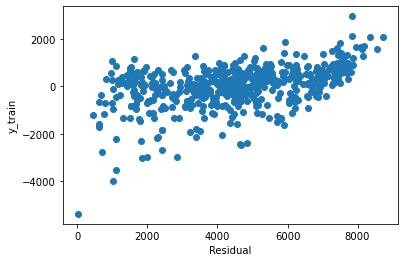

In [58]:
# scatter plot for the check

residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for Test Data

In [59]:
#Scaling variables in X_test

num_vars = ['temp', 'atemp', 'humidity', 'windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [60]:
#Cols from final model 

cols = ['year', 'holiday', 'temp', 'windspeed', 'season_Rainy','season_Summer', 
        'season_Winter', 'month_Jul','month_Sep', 'weathersit_Moderate']

#Predicting the values for test data
y_test_pred = lr.predict(X_test[cols])

### R-Squared value for test predictions

In [61]:
r2_score(y_test,y_test_pred)

0.777971386175007

### Homoscedacity

R2 value for predictions on test data (0.777) is near to the R2 value of train data(0.791). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

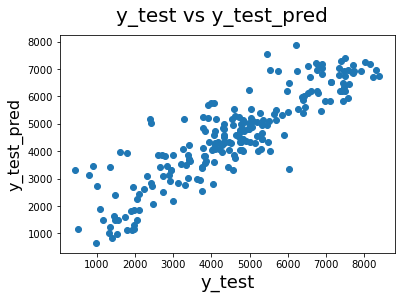

In [62]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### Plot Test vs Predicted test values

In [63]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

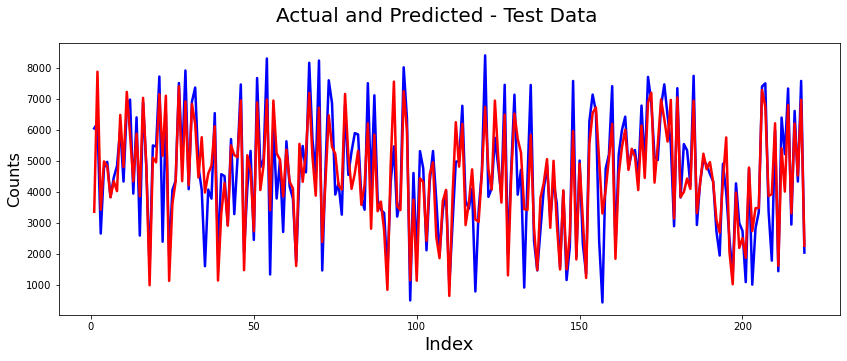

In [64]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### As we can see predictions for test data is very close to actuals

### Plot Error Terms for test data

In [65]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

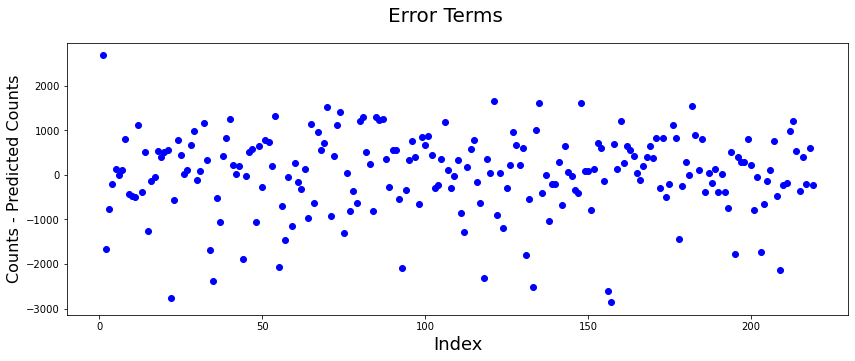

In [66]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

## Conclusion

Significant variables to predict the demand for shared bikes
1. year
2. holiday
3. temp
4. windspeed
5. season(Rainy, Summer, Winter)
6. month(July, September)
7. weathersit(Moderate)

Analysis:
- Company should focus on expanding business during the month of July and September and also during Season like Summer, Rainy and winter.
- During holiday there is less booking, hence business can reduce their services during holidays.
- During good and moderate weather, company should focus on expanding their business.